# Data exploration for the corrupted CIFAR-10-C dataset

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.pylabtools import figsize

import seaborn as sns

import numpy as np
import pandas as pd
import torch

## CIFAR 10-C dataset details:

This dataset contains the CIFAR test images corrupted at different degrees of severity, with the first 10k at level one, last 10k at level 10.

In [2]:
from torchvision.datasets import CIFAR10
from torchvision import transforms

cifar_baseline = CIFAR10(root='/Users/luke/Datasets/', train=False, transform=transforms.ToTensor())

In [3]:
corruption_names = ['brightness', 'gaussian_noise ', 'saturate', 'contrast', 'glass_blur', 'shot_noise', 'defocus_blur', 'impulse_noise',
'snow', 'elastic_transform', 'jpeg_compression', 'spatter', 'fog', 'labels', 'speckle_noise', 'frost', 'motion_blur', 'zoom_blur',
'gaussian_blur', 'pixelate']

In [4]:
from datasets import load_corrupted

In [5]:
corrupted = {}
corrupted[0] = cifar_baseline
corrupted[1] = load_corrupted('fog', severity=1)
corrupted[2] = load_corrupted('fog', severity=2)
corrupted[3] = load_corrupted('fog', severity=3)
corrupted[4] = load_corrupted('fog', severity=4)
corrupted[5] = load_corrupted('fog', severity=5)

In [6]:
figsize(60, 200)
_ = plt.subplots(20, 6)

for row in range(20):
    for col in range(6):
        plt.subplot(20, 6, 1 + col + 6*row)
        plt.imshow( corrupted[col][row][0].permute([1,2,0])  )



Looks good. It's not super simple to check the image - target alignment. Simple differencing is insufficient.

#### Make sure that we can do transformations

In [7]:
# Baseline CIFAR 
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

cifar_normalized = CIFAR10(root='/Users/luke/Datasets/', train=False, transform=transform)

corrupted_normlized = load_corrupted('fog', severity=1, transform=transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8980392..1.0].


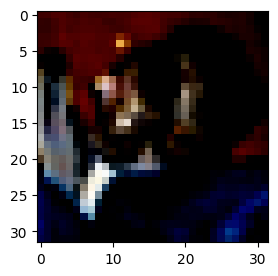

In [8]:
figsize(3,3)
_=plt.imshow(cifar_normalized[0][0].permute([1,2,0]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.7578125..0.8515625].


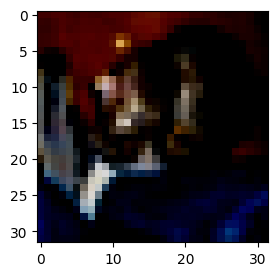

In [9]:
plt.imshow(corrupted_normlized[0][0].permute([1,2,0]))

Ok great. Transformations look good too.

### Generating rotated datasets

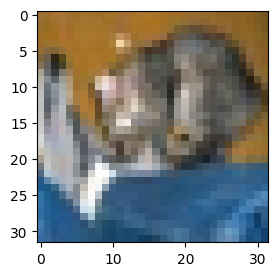

In [10]:
def showimg(img):
    plt.imshow(img.permute([1,2,0]))

showimg(cifar_baseline[0][0])

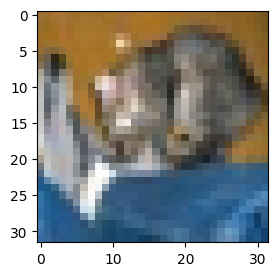

In [11]:
showimg( transforms.functional.rotate(cifar_baseline[0][0], 0))

In [42]:
%run datasets.py

<Figure size 5000x2000 with 0 Axes>

In [43]:
dataset =  rotated_dataset(corrupted_normlized.tensors[0], method='sample')

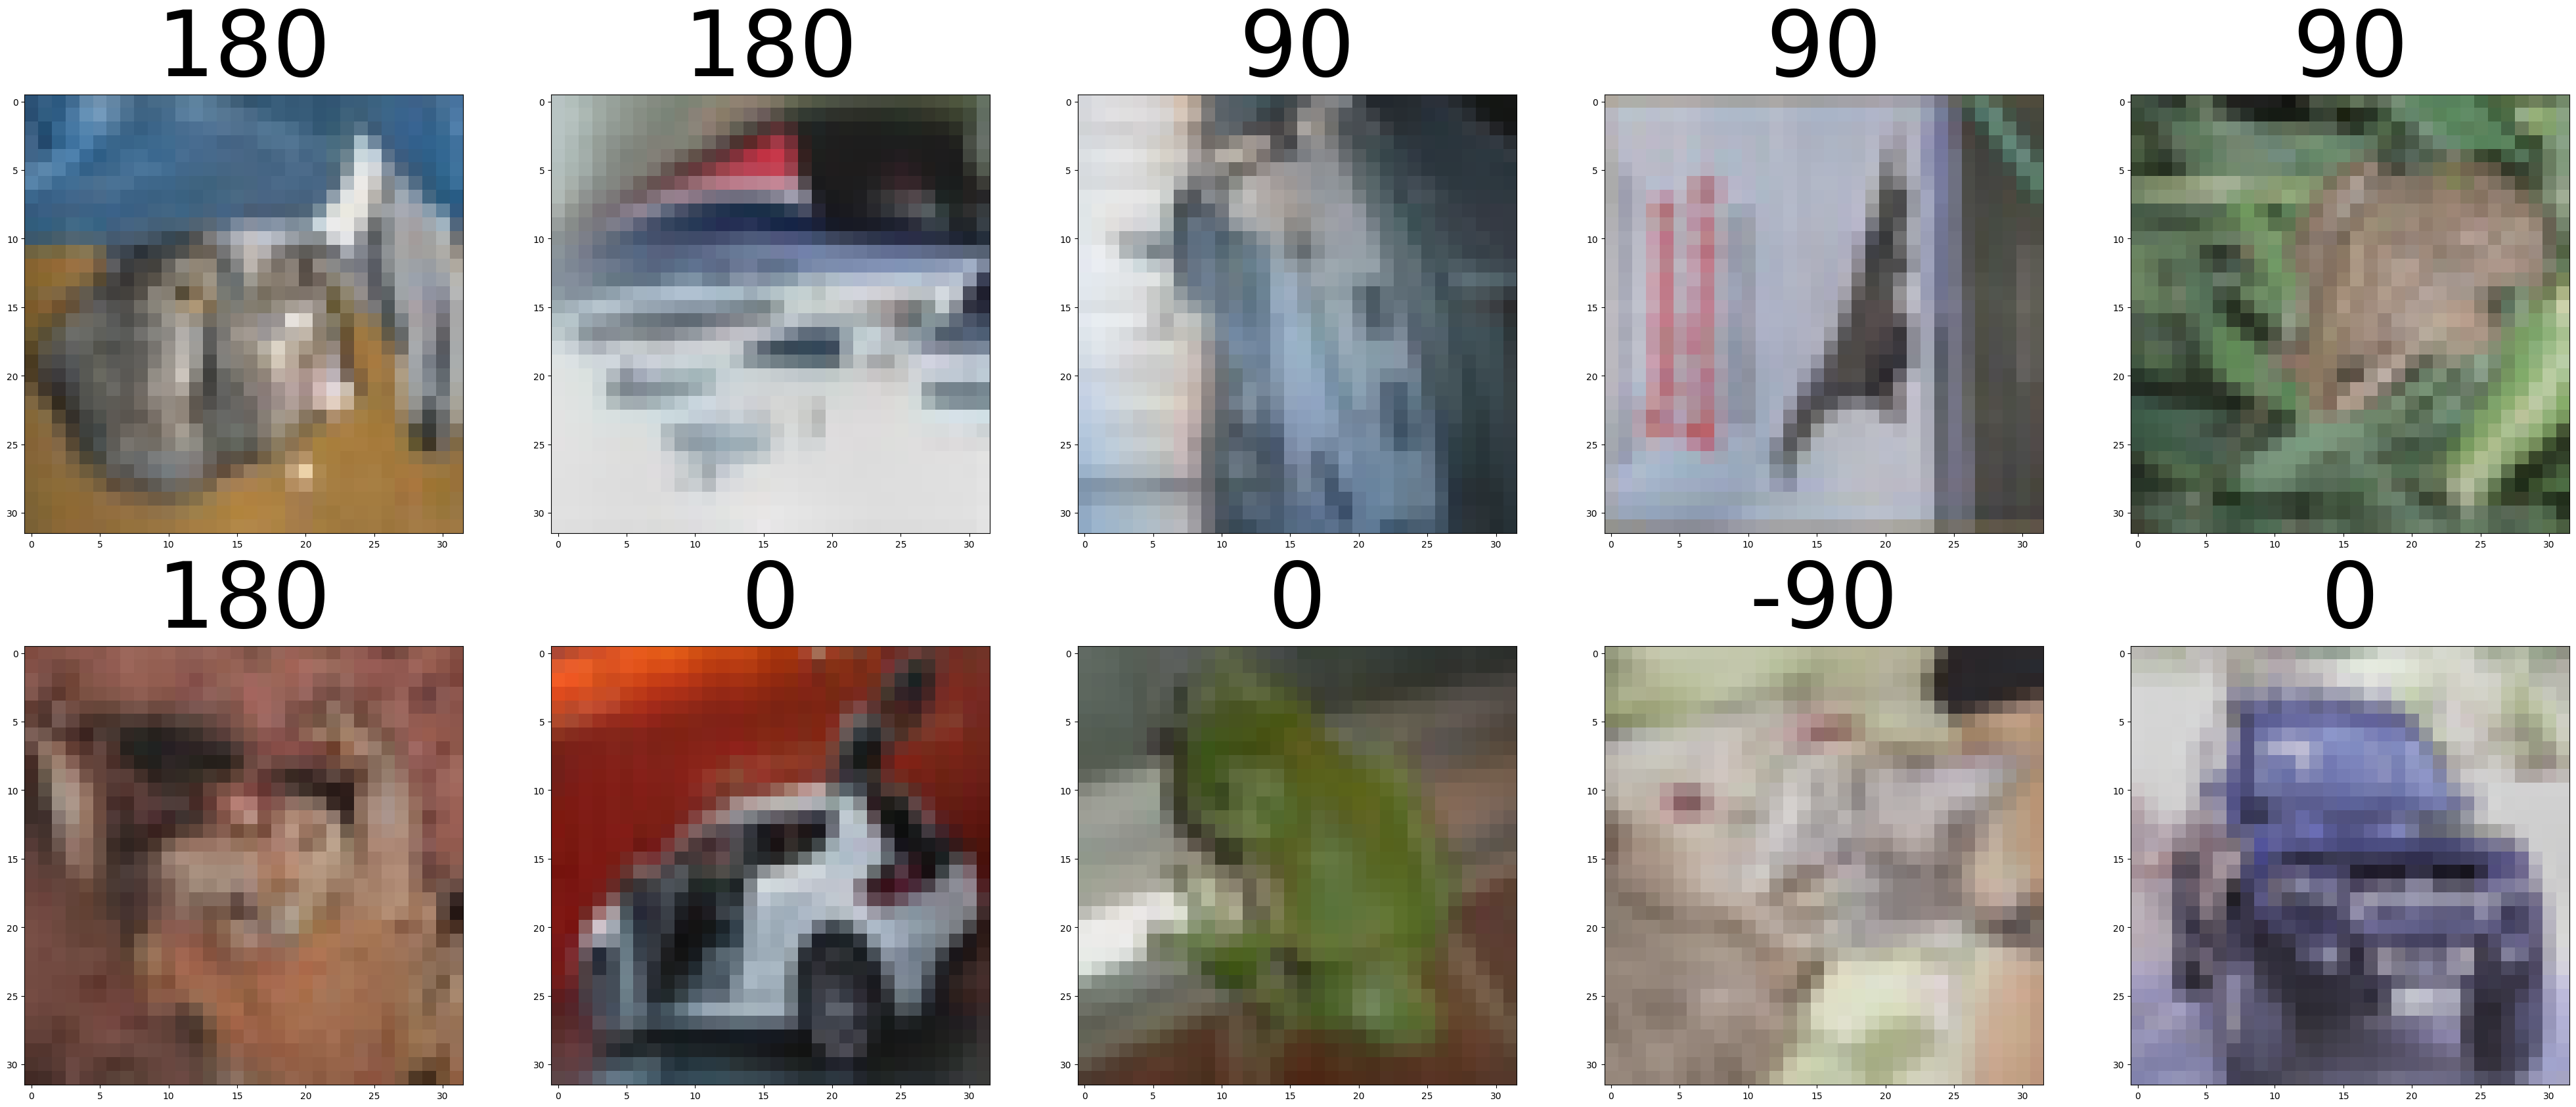

In [37]:
figsize(50, 20)
plt.subplots(2, 5)
for i in range(10):
    plt.subplot(2,5,i+1)
    img, target = dataset[i]
    plt.imshow( 0.5*img.permute([1,2,0]) + 0.5 )
    plt.title(target.item(), fontsize=100)

Looks good.

In [92]:
%run datasets.py

In [93]:
img, target =  rotated_dataset(corrupted_normlized.tensors[0], method='all', return_dataset=False )
img, targets2 =  rotated_dataset(corrupted_normlized.tensors[0], method='all', return_dataset=False, tensor_embedding=True)

In [94]:
target[0:10]

tensor([0, 1, 2, 3, 0, 1, 2, 3, 0, 1])

In [95]:
targets2[0:10]

tensor([[ 1.0000e+00,  0.0000e+00],
        [-4.3711e-08,  1.0000e+00],
        [-4.3711e-08, -1.0000e+00],
        [-1.0000e+00, -8.7423e-08],
        [ 1.0000e+00,  0.0000e+00],
        [-4.3711e-08,  1.0000e+00],
        [-4.3711e-08, -1.0000e+00],
        [-1.0000e+00, -8.7423e-08],
        [ 1.0000e+00,  0.0000e+00],
        [-4.3711e-08,  1.0000e+00]])

In [73]:
map(lambda d: {0:0, 90:1, -90: 2, 

torch.Size([40000])

In [74]:
angles_radians = (2*np.pi / 360) * target

In [75]:
angles_radians

tensor([ 0.0000,  1.5708, -1.5708,  ...,  1.5708, -1.5708,  3.1416])

In [78]:
angles = [0, 90, -90, 180]

tensor([0, 1, 2,  ..., 1, 2, 3])

In [87]:
indices = {angle: i for i, angle in enumerate(angles)}

In [89]:
indices

{0: 0, 90: 1, -90: 2, 180: 3}